
# Adding Limit Orders to the Trading Bot (Take Profit & Stop Loss) 

In [1]:
import sys
sys.path.append("../")
from trading.api import OANDA_API
import pandas as pd
import numpy as np
import tpqoa
from datetime import datetime, timedelta, timezone
import time
import pytz
from datetime import datetime

import matplotlib.pyplot as plt
from trading import MyTT

In [2]:
instrument = "EUR_USD"
bar_length = timedelta(minutes = 1)
SMA = 200
dev = 2

In [3]:
# raw_data = None
# now = datetime.utcnow()
       
# now = now - timedelta(microseconds = now.microsecond)
# past = now - timedelta(days = 2)


# print (f"Getting candles for {instrument}, from {past} to {now}")

# raw_df = tpqoa.tpqoa("../../config/oanda_demo.cfg").get_history(instrument = instrument, start = past, end = now,
#                        granularity = "S30", price = "M", localize = True).c.dropna().to_frame()

# raw_df.rename(columns = {"c":instrument}, inplace = True)


# # last_bar = raw_data.index[-1].to_pydatetime().replace(tzinfo=None)
        

In [4]:
# raw_df = pd.read_pickle(f"../../data/backtest_{instrument}.pcl")

In [5]:
api = OANDA_API("../../config/oanda.cfg")
raw_df = api.get_history_with_all_prices(instrument, 10)

In [6]:
raw_df

,ask,bid,EUR_USD
time,,,
2024-02-12 20:10:30,1.07748,1.07734,1.077410
2024-02-12 20:11:00,1.07746,1.07731,1.077385
2024-02-12 20:11:30,1.07753,1.07738,1.077455
2024-02-12 20:12:00,1.07747,1.07732,1.077395
2024-02-12 20:12:30,1.07747,1.07732,1.077395
...,...,...,...
2024-02-22 20:08:30,1.08224,1.08210,1.082170
2024-02-22 20:09:00,1.08217,1.08202,1.082095
2024-02-22 20:09:30,1.08222,1.08207,1.082145


In [7]:
df = raw_df.copy()
    
df["SMA"] = df[instrument].rolling(SMA).mean()
std = df[instrument].rolling(SMA).std() * dev
df["std"] = df[instrument].rolling(60).std()
df["std_sma"] = df["std"].rolling(60).mean()

df["Lower"] = df["SMA"] - std
df["Upper"] = df["SMA"] + std

df


,ask,bid,EUR_USD,SMA,std,std_sma,Lower,Upper
time,,,,,,,,
2024-02-12 20:10:30,1.07748,1.07734,1.077410,NaN,NaN,NaN,NaN,NaN
2024-02-12 20:11:00,1.07746,1.07731,1.077385,NaN,NaN,NaN,NaN,NaN
2024-02-12 20:11:30,1.07753,1.07738,1.077455,NaN,NaN,NaN,NaN,NaN
2024-02-12 20:12:00,1.07747,1.07732,1.077395,NaN,NaN,NaN,NaN,NaN
2024-02-12 20:12:30,1.07747,1.07732,1.077395,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2024-02-22 20:08:30,1.08224,1.08210,1.082170,1.082295,0.000113,0.000132,1.081973,1.082617
2024-02-22 20:09:00,1.08217,1.08202,1.082095,1.082294,0.000111,0.000132,1.081972,1.082617
2024-02-22 20:09:30,1.08222,1.08207,1.082145,1.082294,0.000110,0.000132,1.081972,1.082617


In [ ]:
df.tail(20)

In [8]:
filtered_df = df.query("time >= '2024-02-16 12:00:00' and time < '2024-02-16 13:00:00'")

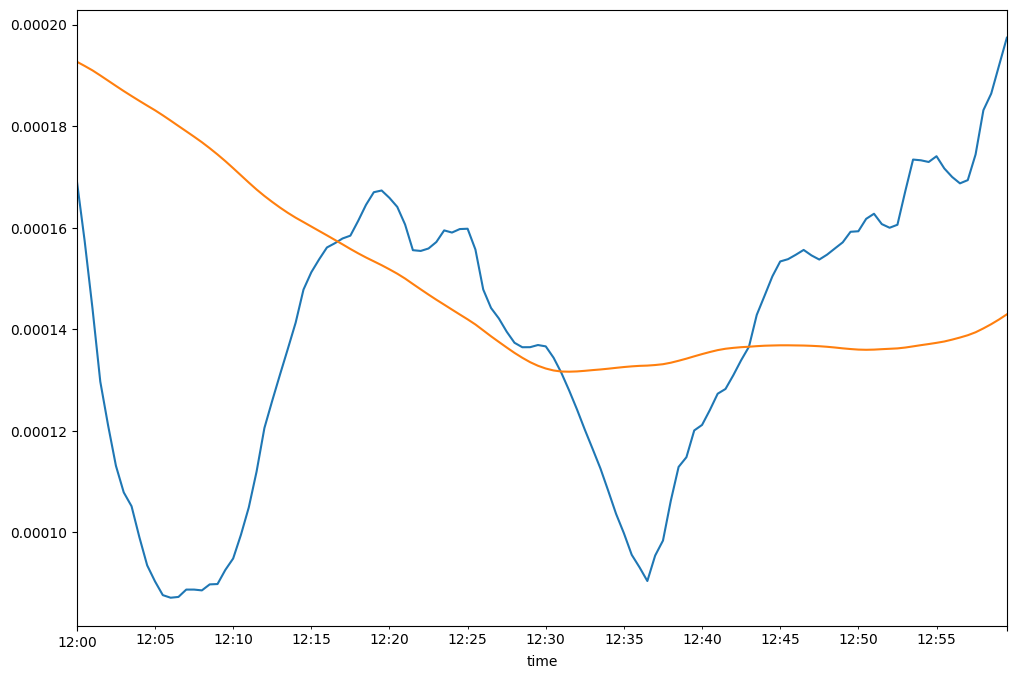

In [9]:
# filtered_df[instrument].plot(figsize = (12, 8))
filtered_df["std"].plot(figsize = (12, 8))
filtered_df["std_sma"].plot(figsize = (12, 8))
# filtered_df["std_upper"].plot(figsize = (12, 8), secondary_y = "position")
# filtered_df["std_lower"].plot(figsize = (12, 8), secondary_y = "position")

plt.show()

In [ ]:
# M = filtered_df["SMA"].values
# M = pd.Series(M)
# poly = np.polyfit(M.index, M.values, deg=1)
# poly
slope = MyTT.SLOPE(filtered_df["SMA"].values)
slope = round(slope, 6)
slope

In [ ]:
'{0:f}'.format(slope)

In [ ]:
filtered_df[instrument].plot(figsize = (12, 8))
filtered_df["SMA"].plot(figsize = (12, 8))